In [6]:
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt



In [7]:
data('co2', show_doc=True)
co2 = data('co2')

co2

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Mauna Loa Atmospheric CO2 Concentration

### Description

Atmospheric concentrations of CO_2_ are expressed in parts per million (ppm)
and reported in the preliminary 1997 SIO manometric mole fraction scale.

### Usage

    co2

### Format

A time series of 468 observations; monthly from 1959 to 1997.

### Details

The values for February, March and April of 1964 were missing and have been
obtained by interpolating linearly between the values for January and May of
1964.

### Source

Keeling, C. D. and Whorf, T. P., Scripps Institution of Oceanography (SIO),
University of California, La Jolla, California USA 92093-0220.

ftp://cdiac.esd.ornl.gov/pub/maunaloa-co2/maunaloa.co2.

### References

Cleveland, W. S. (1993) _Visualizing Data_. New Jersey: Summit Press.

### Examples

    require(graphics)
    plot(co2, ylab = expression("Atmospheric concentration of CO"[2]),
         las = 1)
    t

Review of Basic Statistics - Simple Linear Regression

```
Yi = linear model plus noise
  = (B0 + B1X1) + E1
```

```
Q = Sum of (Observed - Predicted)^2

Yi = i-th observed response variable
Zi = i-th predicted response variable
   = slope * Xi + intercept
```   
We need to find a good value for slope and intercept

```
slope = b1 = SSxy/SSxx = SumOf( (x1 - x0)(yi - y0) ) / SumOf( x1 - x0 )( x1 - x0 )

intercept = b0 = y0 - b1 * x0
```

In [10]:
x0 = co2['time'].mean()
y0 = co2['co2'].mean()
x1_x0 = co2['time'] - x0
SSxy = sum(x1_x0 * (co2['co2'] - y0))
SSxx = sum(x1_x0 * x1_x0)

slope = SSxy / SSxx
slope

1.307496690611379

In [11]:
intercept = y0 - slope * x0
intercept

-2249.774197706991

If we use numpy's linalg.lstsq algorithm, we might achieve the same thing

```
co2.linear.model = lm(co2 ~ time(co2) )
```

In [26]:
n = np.max(co2['time'].shape)
my_x = np.vstack([co2['time'], np.ones(n)]).T
n, my_x

lm = np.linalg.lstsq(a=my_x, b=co2['co2'], rcond=None)
slope, intercept = lm[0]
slope, intercept

(1.3074966906113779, -2249.7741977069886)

In [25]:
lm[1]

array([3194.08042306])

Plot the line with the data

```
plot(co2, main="Atmospheric CO2 Concentration with fitted line")
abline(co2.linear.model)
```

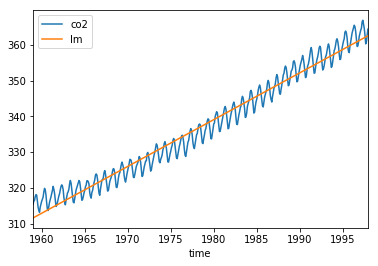

In [28]:
co2["lm"] = slope * co2["time"] + intercept

co2.plot(x='time', y=["co2", "lm"])

Reviewing Basic Statistics II More Linear Regression

```
co2.residuals = resid(co2.lm)
hist(co2.residuals, main="Histogram of Residuals")
```

In [29]:
lm

(array([ 1.30749669e+00, -2.24977420e+03]),
 array([3194.08042306]),
 2,
 array([4.28012962e+04, 1.23101097e-01]))

1      311.611819
2      311.720777
3      311.829735
4      311.938693
5      312.047651
6      312.156609
7      312.265568
8      312.374526
9      312.483484
10     312.592442
11     312.701400
12     312.810358
13     312.919316
14     313.028274
15     313.137232
16     313.246190
17     313.355148
18     313.464106
19     313.573064
20     313.682022
21     313.790980
22     313.899938
23     314.008896
24     314.117855
25     314.226813
26     314.335771
27     314.444729
28     314.553687
29     314.662645
30     314.771603
31     314.880561
32     314.989519
33     315.098477
34     315.207435
35     315.316393
36     315.425351
37     315.534309
38     315.643267
39     315.752225
40     315.861183
41     315.970142
42     316.079100
43     316.188058
44     316.297016
45     316.405974
46     316.514932
47     316.623890
48     316.732848
49     316.841806
50     316.950764
51     317.059722
52     317.168680
53     317.277638
54     317.386596
55     317.495554
56     317